In [1]:
! hostname

c01


In [2]:
# enable autoreload
%load_ext autoreload
%autoreload 2

In [3]:
import os
import time
import sys
import random
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import torch
from anndata import AnnData
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad

from sklearn import metrics
import multiprocessing as mp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import scipy.sparse as sp
import scipy.linalg

import warnings
warnings.filterwarnings("ignore")

/share/home/liangzhongming/anaconda3/envs/cellniche/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [33]:
plt.rcParams['pdf.fonttype'] = 42
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=150,
                     dpi_save=300,
#                      facecolor='w',
#                      frameon=False, # frameon=True
#                      figsize=(4,4)
                    ) 
%config InlineBackend.figure_format='retina'
%matplotlib inline

scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [4]:
# import cellniche as cn

sys.path.append('/share/home/liangzhongming/phd_code/530/CellNiche/release')
import cellniche as cn

## Fig4

In [5]:
# TO MATCH PAPER FIGURES
adata = sc.read_h5ad('/share/home/liangzhongming/phd_code/530/CellNiche/data/NSCLC_CellNiche.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 765771 × 960
    obs: 'sample', 'cell_type', 'niche', 'fov', 'cell_ID', 'patient', 'n_counts', 'CellNiche_17', 'CellNiche_12'
    var: 'n_counts'
    uns: 'CellNiche_12_colors', 'CellNiche_17_colors', 'log1p', 'spatial_fov', 'spatial_neighbors'
    obsm: 'CellNiche_pheno', 'RNA', 'protein', 'spatial', 'spatial_fov'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [7]:
adata.obs['sample'].value_counts()

sample
LUAD-9 R2    139504
LUAD-5 R2    100335
LUAD-5 R1     98002
LUAD-5 R3     97809
LUSC-6        89975
LUAD-9 R1     87606
LUAD-13       81236
LUAD-12       71304
Name: count, dtype: int64

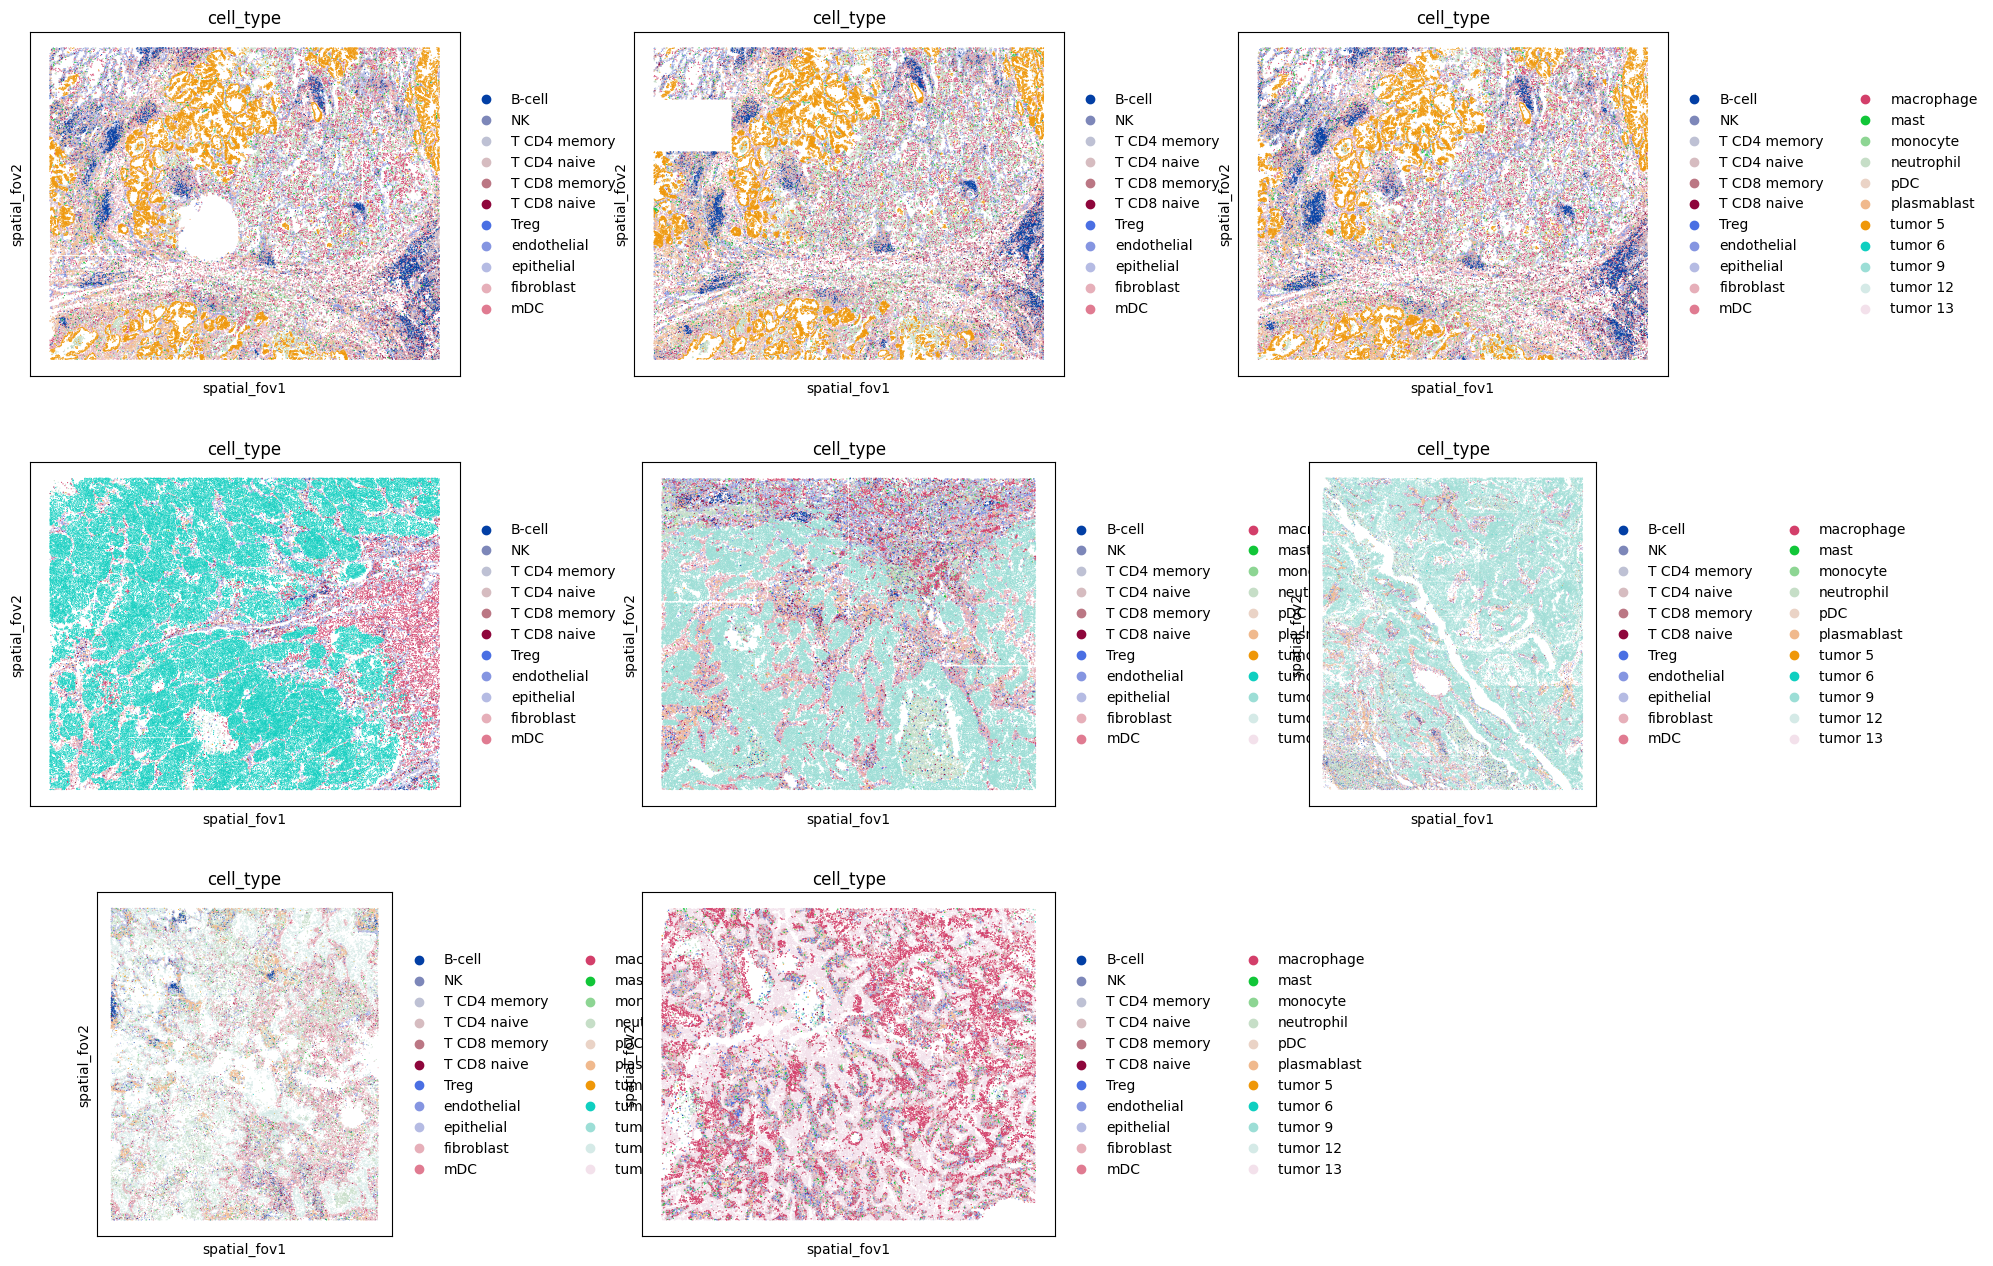

In [8]:
sq.pl.spatial_scatter(
    adata, 
    color=['cell_type'], 
    library_key='sample',
    size=40, 
    img=None,
    spatial_key='spatial_fov',
#     figsize=(4,3),
    ncols=3,
    library_id=['LUAD-5 R1', 'LUAD-5 R2', 'LUAD-5 R3', 'LUSC-6', 'LUAD-9 R1', 'LUAD-9 R2', 'LUAD-12', 'LUAD-13'],
)

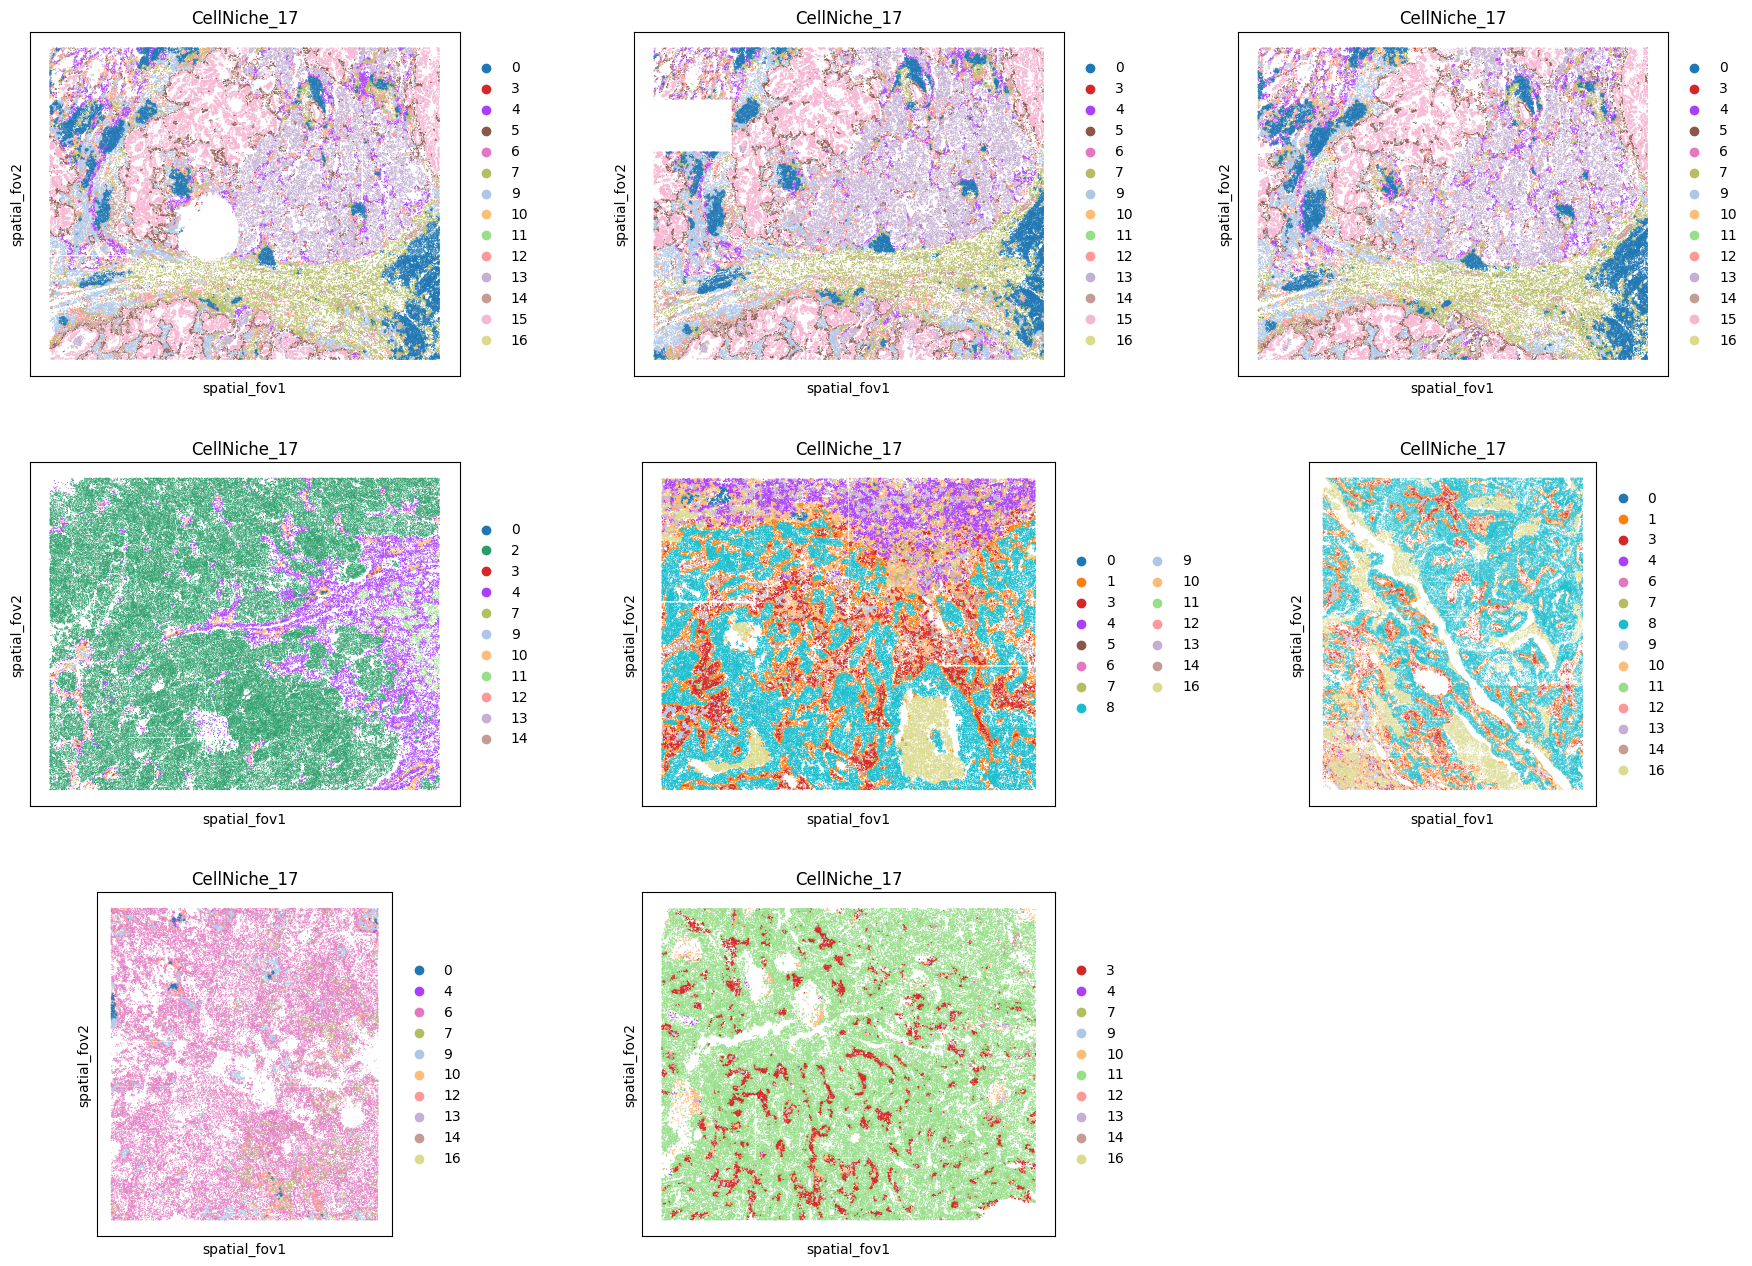

In [9]:
sq.pl.spatial_scatter(
    adata, 
    color=['CellNiche_17'], 
    library_key='sample',
    size=40, 
    img=None,
    spatial_key='spatial_fov',
#     figsize=(4,3),
    ncols=3,
    library_id=['LUAD-5 R1', 'LUAD-5 R2', 'LUAD-5 R3', 'LUSC-6', 'LUAD-9 R1', 'LUAD-9 R2', 'LUAD-12', 'LUAD-13'],
)

## Fig5

In [10]:
# TO MATCH PAPER FIGURES
nsclc_subRegion = sc.read_h5ad('/share/home/liangzhongming/phd_code/530/CellNiche/data/NSCLC_subRegion_CellNiche.h5ad')

In [11]:
nsclc_subRegion

AnnData object with n_obs × n_vars = 6682 × 960
    obs: 'sample', 'cell_type', 'niche', 'fov', 'cell_ID', 'patient', 'n_counts', 'supervised_cellType', 'CellNiche_17'
    var: 'n_counts'
    uns: 'CellNiche_17_colors', 'log1p', 'spatial_fov', 'spatial_neighbors'
    obsm: 'CellNiche_pheno', 'RNA', 'protein', 'spatial', 'spatial_fov'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

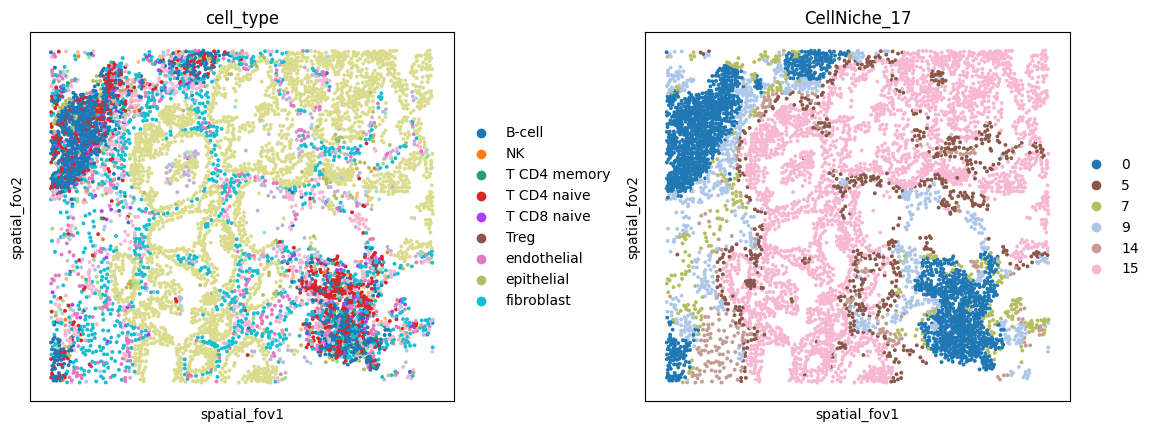

In [12]:
sq.pl.spatial_scatter(
    nsclc_subRegion, 
    color=['cell_type', 'CellNiche_17'], 
    library_key='sample',
    size=35, 
    img=None,
    spatial_key='spatial_fov',
#     figsize=(4,3),
    ncols=3,
    library_id=['LUAD-5 R1'],
)